In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
train_df = pd.read_csv('C:/Users/miray/OneDrive/Desktop/Internship/SCT_ML_1/train.csv')
test_df = pd.read_csv('C:/Users/miray/OneDrive/Desktop/Internship/SCT_ML_1/test.csv')

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
X_train = train_df[features]
y_train = train_df['SalePrice']

X_test = test_df[features]


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

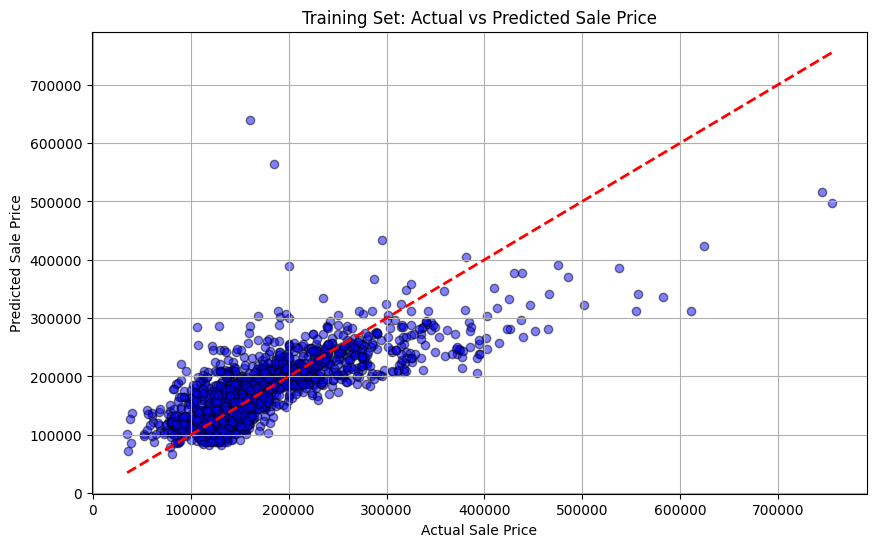

In [5]:
y_pred_train = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Training Set: Actual vs Predicted Sale Price')
plt.grid(True)
plt.show()


In [6]:
predicted_prices = model.predict(X_test)
output = pd.DataFrame({
    'Id': test_df['Id'],
    'PredictedPrice': predicted_prices
})

output.to_csv('predicted_test_prices.csv', index=False)
output.head()


,Id,PredictedPrice
0,1461,119523.739163
1,1462,142059.630497
2,1463,204907.547697
3,1464,202201.953228
4,1465,191462.453776


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

train_df = pd.read_csv('C:/Users/miray/OneDrive/Desktop/Internship/SCT_ML_1/train.csv')

X = train_df.drop(columns=['Id', 'SalePrice'])
y = train_df['SalePrice']

X = X.fillna('Missing')
X = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

print(f"Validation R² Score: {r2_score(y_val, y_val_pred):.4f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"Validation MSE: {mean_squared_error(y_val, y_val_pred):.4f}")


Validation R² Score: 0.8190
Validation MAE: 23717.0772
Validation MSE: 1388669251.4200


In [12]:
import numpy as np
import pandas as pd

feature_names = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']

sqft = float(input("Enter living area : "))
bed = int(input("Enter number of bedrooms : "))
full = int(input("Enter number of full baths : "))
half = int(input("Enter number of half baths : "))

input_df = pd.DataFrame([[sqft, bed, full, half]], columns=feature_names)

predicted_price = model.predict(input_df)

print(f"\nEstimated House Price: ${predicted_price[0]:,.2f}")


Enter living area :  1
Enter number of bedrooms :  1
Enter number of full baths :  1
Enter number of half baths :  1



Estimated House Price: $54,161.70
